In [2]:
import sys
import os
path = '/'.join(os.getcwd().split('/')[:-2])
sys.path.append(path)

import geopandas as gpd
from shapely.geometry import Point
from pyproj import Transformer
from jhm_metric import JhmMetric
import networkx as nx

In [3]:
# set global and local crs systems
local_crs = 32636
global_crs = 4326

In [4]:
# read dataset with avg rent price and house locations (geometry)
house_prices = gpd.read_parquet(path + '/app/data/houses_price_demo.parquet').to_crs(local_crs)

In [5]:
# read drive nx graph
G_d = nx.read_graphml(path + '/app/data/G_drive.graphml')

In [6]:
# define company's potential location
# and convert coordinates crs to local crs
x = 59.860510
y = 30.211518

company_location = Point(Transformer.from_crs(global_crs, local_crs).transform(x, y))

In [7]:
res = JhmMetric.main(
    G_d,
    house_prices,
    company_location,
    salary=60_000,
    room_area_m2=40,
    filter_coef=True,
    debug_mode=False,
    return_json=False,
    local_crs=local_crs
)

In [10]:
display(res.head())

,coef,avg_m2_price_rent,log_dists,geometry
166,0.699173,545.454545,1.922725,"POLYGON ((346941.171 6656123.546, 346934.834 6..."
177,0.615247,583.333333,1.582063,"POLYGON ((350269.313 6644954.713, 350258.483 6..."
198,0.687842,537.634409,1.919078,"POLYGON ((349095.725 6657313.274, 349093.974 6..."
244,0.579515,869.272942,1.000000,"MULTIPOLYGON (((341021.332 6639596.179, 341050..."
245,0.472382,708.573345,1.000000,"POLYGON ((342753.729 6637718.340, 342767.090 6..."


<Axes: >

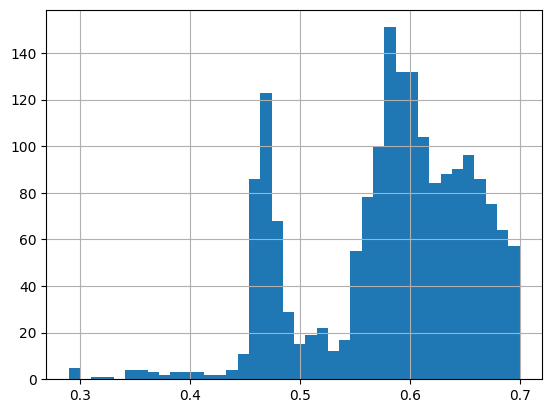

In [9]:
res.sort_values(by='coef')['coef'].hist(bins=40)

In [ ]:
# gpd.GeoDataFrame(res).to_file('test.geojson')